In [2]:
import PyPDF2
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
import matplotlib.pyplot as plt
from collections import Counter
import fitz  # PyMuPDF
from wordcloud import WordCloud
from spacy import displacy

# Loading and Preprocessing the Corpus

## Extracting the Data

In [2]:
def extract_pdf(file_path,from_page_number,to_page_number):
    extracted_data = ""
    pdf = PyPDF2.PdfReader(file_path)
    for i in range(from_page_number,to_page_number):
        page = pdf.pages[i]
        extracted_data += page.extract_text()
    return extracted_data

In [3]:
extracted_data_PMI = extract_pdf("../input/practice-standard-project-risk-management.pdf",12,123)

In [4]:
print(extracted_data_PMI)

1©2009 Project Management Institute. Practice Standard for Project Risk Management1
  CHAPTER 1 
 INTRODUCTION 
 Project Management Institute (PMI) practice standards are guides to the use of a tool, technique, or process 
identiﬁ  ed in  A Guide to the Project Management Body of Knowledge   ( PMBOK   ®  Guide  – Fourth Edition) or 
other PMI standards. Practice standards are targeted at audiences who participate in the management of 
projects. This includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders. 
 A PMI practice standard describes processes, activities, inputs, and outputs for a speciﬁ  c Knowledge Area. 
It provides information on what the signiﬁ  cant process, tool, or technique is, what it does, why it is signiﬁ  cant, 
when it should be performed or executed, and, if necessary for further clariﬁ  cation, who should perform the process. A practice standard does not prescribe how the process is to be implemented, leaving

# Cleaning PMI

In [5]:
def cleaning_pmi(pmi_corpus,tokenize=False):
    # Define a list of patterns and substitutions
    patterns_substitutions = [
        (r'ﬁ\s\s', 'fi'),  # Replace 'fi' with 'fi'
        (r'\d©2009 Project Management Institute\. Practice Standard for Project Risk Management\d', ''),  # Remove footer
        (r'©2009 Project Management Institute. Practice Standard for Project Risk Management', ''),  # Remove the copyright notice
        (r'[^a-zA-Z0-9 .]+', ''),  # Remove punctuation and unwanted characters
        (r'\s+', ' '), #remove extra spaces

        
    ]

    # Apply all patterns and substitutions in sequence
    for pattern, substitution in patterns_substitutions:
        pmi_corpus = re.sub(pattern, substitution, pmi_corpus)

   

    if tokenize:
        tokens = word_tokenize(pmi_corpus)

        # Stopword removal
        stopwords_set = set(stopwords.words('english'))
        filtered_tokens = [token for token in tokens if token not in stopwords_set]
    
        return filtered_tokens

    return pmi_corpus


In [6]:
print(cleaning_pmi(extracted_data_PMI,tokenize=True))
tokenized_pmi = cleaning_pmi(extracted_data_PMI,tokenize=True)

['chapter', '1', 'introduction', 'project', 'management', 'institute', 'pmi', 'practice', 'standards', 'guides', 'use', 'tool', 'technique', 'process', 'identified', 'guide', 'project', 'management', 'body', 'knowledge', 'pmbok', 'guide', 'fourth', 'edition', 'pmi', 'standards', 'practice', 'standards', 'targeted', 'audiences', 'participate', 'management', 'projects', 'includes', 'project', 'managers', 'project', 'personnel', 'contract', 'personnel', 'supervisors', 'project', 'stakeholders', 'pmi', 'practice', 'standard', 'describes', 'processes', 'activities', 'inputs', 'outputs', 'specific', 'knowledge', 'area', 'provides', 'information', 'significant', 'process', 'tool', 'technique', 'significant', 'performed', 'executed', 'necessary', 'clarification', 'perform', 'process', 'practice', 'standard', 'prescribe', 'process', 'implemented', 'leaving', 'subject', 'forums', 'handbooks', 'manuals', 'courses', 'chapter', 'includes', 'following', 'sections', '11', 'purpose', 'practice', 'stan

In [8]:
# Load spaCy's English NLP model
nlp = spacy.load("en_core_web_sm")

text = " ".join(tokenized_pmi)

doc = nlp(text)

# Access POS tags for each token in the Doc
for token in doc:
    print(f"{token.text}: {token.pos_}")

chapter: NOUN
1: NUM
introduction: NOUN
project: PROPN
management: PROPN
institute: PROPN
pmi: PROPN
practice: NOUN
standards: NOUN
guides: NOUN
use: VERB
tool: NOUN
technique: NOUN
process: NOUN
identified: VERB
guide: NOUN
project: NOUN
management: NOUN
body: NOUN
knowledge: NOUN
pmbok: PROPN
guide: VERB
fourth: PROPN
edition: NOUN
pmi: PROPN
standards: PROPN
practice: NOUN
standards: NOUN
targeted: VERB
audiences: NOUN
participate: VERB
management: NOUN
projects: NOUN
includes: VERB
project: NOUN
managers: NOUN
project: NOUN
personnel: NOUN
contract: NOUN
personnel: NOUN
supervisors: NOUN
project: VERB
stakeholders: NOUN
pmi: PROPN
practice: PROPN
standard: ADJ
describes: NOUN
processes: VERB
activities: NOUN
inputs: VERB
outputs: NOUN
specific: ADJ
knowledge: NOUN
area: NOUN
provides: VERB
information: NOUN
significant: ADJ
process: NOUN
tool: NOUN
technique: NOUN
significant: ADJ
performed: VERB
executed: VERB
necessary: ADJ
clarification: NOUN
perform: NOUN
process: NOUN
practice

###  POS Frequency Analysis with Bar Chart

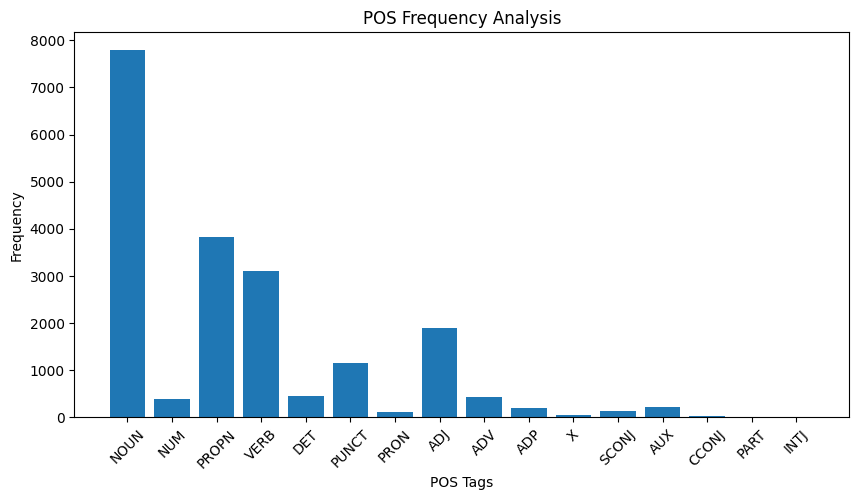

In [40]:
pos_counts = Counter(token.pos_ for token in doc)

# Create a bar chart for POS frequency analysis
pos_labels, pos_values = zip(*pos_counts.items())

plt.figure(figsize=(10, 5))
plt.bar(pos_labels, pos_values)
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("POS Frequency Analysis")
plt.xticks(rotation=45)
plt.show()

### WordCloud for nouns

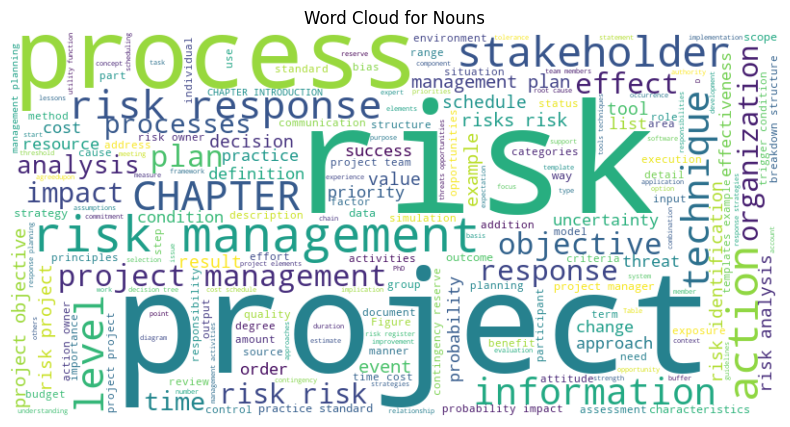

In [41]:
# Filter tokens to include only nouns
nouns = [token.text for token in doc if token.pos_ == "NOUN"]

# Create a word cloud for nouns
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(nouns))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Nouns")
plt.show()


In [46]:
#Initialize a counter for nouns
noun_counter = Counter()

# Iterate through the tokens in the document and count nouns
for token in doc:
    if token.pos_ == "NOUN":
        noun_counter[token.text] += 1

# Get the most frequent nouns (e.g., top 10)
most_common_nouns = noun_counter.most_common(10)

# Print the most frequent nouns and their frequencies
for noun, frequency in most_common_nouns:
    print(f"Noun: {noun}, Frequency: {frequency}")

Noun: risk, Frequency: 575
Noun: project, Frequency: 552
Noun: risks, Frequency: 260
Noun: management, Frequency: 237
Noun: process, Frequency: 141
Noun: Risk, Frequency: 131
Noun: objectives, Frequency: 95
Noun: analysis, Frequency: 86
Noun: stakeholders, Frequency: 81
Noun: plan, Frequency: 78


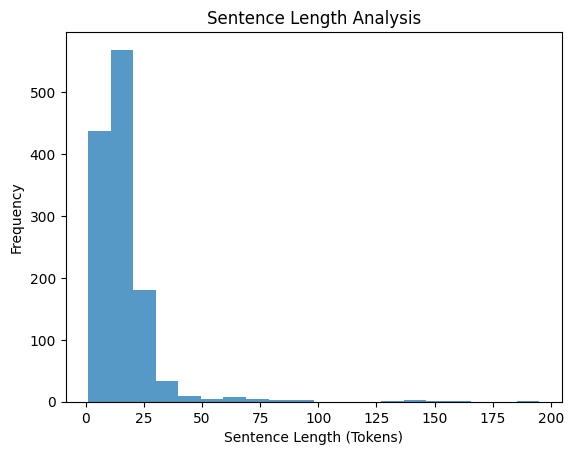

In [44]:
# Calculate sentence lengths (in terms of token count)
sentence_lengths = [len(list(sent)) for sent in doc.sents]

# Create a histogram or box plot to visualize sentence length distribution
plt.hist(sentence_lengths, bins=20, alpha=0.75)
plt.xlabel("Sentence Length (Tokens)")
plt.ylabel("Frequency")
plt.title("Sentence Length Analysis")
plt.show()


In [50]:
# Visualize the syntactic structure of a specific sentence (e.g., the first sentence)
displacy.serve(list(doc.sents)[8], style="dep")



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# Cleaning PMBOK

## Checking whole extracted data

In [109]:
# Open the PDF file
pdf_file_path = "../input/PMBOK6-2017.pdf"  # Replace with the path to your PDF file
pdf_document = fitz.open(pdf_file_path)

# Initialize an empty string to store extracted text
extracted_text = ''

# Iterate through pages and extract text
for page_num in range(395,458):
    page = pdf_document[page_num]
    page_text = page.get_text()
    extracted_text += page_text

# Close the PDF document
pdf_document.close()

# Print or process the extracted text
print(extracted_text)

Not For Distribution, Sale or Reproduction.
360 
Part 1 - Guide
.1 Inputs
.1 Project management plan
.2 Project documents
.3 Work performance reports
.4 Enterprise environmental  
 
 
factors
.5 Organizational process assets
.2 Tools & Techniques
.1 Communication technology
.2 Communication methods
.3 Communication skills
.4 Project management 
 
 
information system
.5 Project reporting
.6 Interpersonal and team skills
.7 Meetings
.3 Outputs
.1 Project communications
.2 Project management plan  
 
 
updates
.3 Project documents updates
.4 Organizational process assets  
 
 
updates
.1 Inputs
.1 Project charter
.2 Project management plan
.3 Project documents
.4 Enterprise environmental  
 
 
factors
.5 Organizational process assets
.2 Tools & Techniques
.1 Expert judgment
.2 Communication requirements  
 
 
analysis
.3 Communication technology
.4 Communication models
.5 Communication methods
.6 Interpersonal and team skills
.7 Data representation
.8 Meetings
.3 Outputs
.1 Communication

## Cleaning PMBOK

In [110]:
extracted_text = extracted_text.replace('Not For Distribution, Sale or Reproduction.','')
extracted_text = extracted_text.replace('Part 1 - Guide','')
pattern = r'\d{3}'
pattern1 = r'(?<![a-zA-Z])u(?!.)'
pattern2 = r'u '
pattern3 = r'n '
extracted_text = re.sub(pattern, '',extracted_text)
extracted_text = re.sub(pattern1, '',extracted_text)
extracted_text = re.sub(pattern2, '',extracted_text)
extracted_text = re.sub(pattern3, '',extracted_text)

In [111]:
print(extracted_text)


 

.1 Inputs
.1 Project management plan
.2 Project documents
.3 Work performance reports
.4 Enterprise environmental  
 
 
factors
.5 Organizational process assets
.2 Tools & Techniques
.1 Communicatiotechnology
.2 Communicatiomethods
.3 Communicatioskills
.4 Project management 
 
 
informatiosystem
.5 Project reporting
.6 Interpersonal and team skills
.7 Meetings
.3 Outputs
.1 Project communications
.2 Project management pla 
 
 
updates
.3 Project documents updates
.4 Organizational process assets  
 
 
updates
.1 Inputs
.1 Project charter
.2 Project management plan
.3 Project documents
.4 Enterprise environmental  
 
 
factors
.5 Organizational process assets
.2 Tools & Techniques
.1 Expert judgment
.2 Communicatiorequirements  
 
 
analysis
.3 Communicatiotechnology
.4 Communicatiomodels
.5 Communicatiomethods
.6 Interpersonal and team skills
.7 Data representation
.8 Meetings
.3 Outputs
.1 Communications management  
 
 
plan
.2 Project management pla 
 
 
updates
.3 Project docu

## Section Extraction and Analysis

In [144]:
def extract_table_of_contents(pdf_path, start_page, end_page):
    pdf_document = fitz.open(pdf_path)
    table_of_contents = ""
    for page_num in range(start_page - 1, end_page):
        page = pdf_document.load_page(page_num)
        table_of_contents += page.get_text()
    
    pdf_document.close()
    return table_of_contents

table_of_contents_text = extract_table_of_contents(pdf_file_path, 11, 12)
print(table_of_contents_text[50:1000])


4 Develop Team................................................................................................................336
9.4.1 Develop Team: Inputs .......................................................................................339
9.4.2 Develop Team: Tools and Techniques ..............................................................340
9.4.3 Develop Team: Outputs ....................................................................................343
9.5 Manage Team................................................................................................................345
9.5.1 Manage Team: Inputs .......................................................................................347
9.5.2 Manage Team: Tools and Techniques ..............................................................348
9.5.3 Manage Team: Outputs ....................................................................................350
9.6 Contro


## Extracting RISK MANAGEMENT only

In [118]:
lines = table_of_contents_text.split('\n')
start = lines.index('11. PROJECT RISK MANAGEMENT .............................................................................................395')
finish = lines.index('12. PROJECT PROCUREMENT MANAGEMENT ............................................................................459')+1
lines = lines[start:finish]
print(lines)

['11. PROJECT RISK MANAGEMENT .............................................................................................395', '11.1 Plan Risk Management ..............................................................................................401', '11.1.1 Plan Risk Management: Inputs ......................................................................402', '11.1.2 Plan Risk Management: Tools and Techniques .............................................404', '11.1.3 Plan Risk Management: Outputs ...................................................................405', 'Not For Distribution, Sale or Reproduction.', 'VIII ', 'Table of Contents', '11.2 Identify Risks ..............................................................................................................409', '11.2.1 Identify Risks: Inputs .....................................................................................411', '11.2.2 Identify Risks: Tools and Techniques .....................................

## Cleaning Table of Contents

In [119]:
table_of_contents_text_clean = ''.join(lines)
table_of_contents_text_clean = table_of_contents_text_clean.replace('Not For Distribution, Sale or Reproduction','')
table_of_contents_text_clean = table_of_contents_text_clean.replace('Table of Contents','')

## Get titles

In [120]:
title_pattern = r'\s+([A-Za-z\s:]+)'
titles = []
title_matches = re.findall(title_pattern, table_of_contents_text_clean)
titles.extend(title_matches)
print(titles)

['PROJECT RISK MANAGEMENT ', 'Plan Risk Management ', 'Plan Risk Management: Inputs ', 'Plan Risk Management: Tools and Techniques ', 'Plan Risk Management: Outputs ', 'Identify Risks ', 'Identify Risks: Inputs ', 'Identify Risks: Tools and Techniques ', 'Identify Risks: Outputs ', 'Perform Qualitative Risk Analysis ', 'Perform Qualitative Risk Analysis: Inputs ', 'Perform Qualitative Risk Analysis: Tools and Techniques ', 'Perform Qualitative Risk Analysis: Outputs ', 'Perform Quantitative Risk Analysis ', 'Perform Quantitative Risk Analysis: Inputs ', 'Perform Quantitative Risk Analysis: Tools and Techniques ', 'Perform Quantitative Risk Analysis: Outputs ', 'Plan Risk Responses ', 'Plan Risk Responses: Inputs ', 'Plan Risk Responses: Tools and Techniques ', 'Plan Risk Responses: Outputs ', 'Implement Risk Responses ', 'Implement Risk Responses: Inputs ', 'Implement Risk Responses: Tools and Techniques ', 'Implement Risk Responses: Outputs', 'Monitor Risks ', 'Monitor Risks: Inputs '

## Get Page Numbers

In [122]:
page_number_pattern = r'\d{3}'
page_numbers = []
page_num_matches = re.findall(page_number_pattern, table_of_contents_text_clean)
page_numbers.extend(page_num_matches)
print(page_numbers)

['395', '401', '402', '404', '405', '409', '411', '414', '417', '419', '421', '422', '427', '428', '430', '431', '436', '437', '439', '441', '447', '449', '450', '451', '451', '453', '455', '456', '457', '459']


## Get Sections

In [89]:
section_pattern = r'^(\d+(\.\d{1,3})*)'
sections = []
for line in lines:
    section_match = re.search(section_pattern, line)
    if section_match:
        sections.append(section_match.group(1))
print(sections)

['11', '11.1', '11.1.1', '11.1.2', '11.1.3', '11.2', '11.2.1', '11.2.2', '11.2.3', '11.3', '11.3.1', '11.3.2', '11.3.3', '11.4', '11.4.1', '11.4.2', '11.4.3', '11.5', '11.5.1', '11.5.2', '11.5.3', '11.6', '11.6.1', '11.6.2', '11.6.3', '11.7', '11.7.1', '11.7.2', '11.7.3', '12']


## Verifying Lengths for each list

In [124]:
print(f' Sections : {len(sections)}')
print(f' Titles : {len(titles)}')
print(f' Page Numbers : {len(page_numbers)}')


 Sections : 30
 Titles : 30
 Page Numbers : 30


## Creating a Dataframe

In [133]:
data = {"Title": titles, "Page_Number": page_numbers, "Section": sections}
df = pd.DataFrame(data)
df.sample(12)

,Title,Page_Number,Section
20,Plan Risk Responses: Outputs,447,11.5.3
27,Monitor Risks: Tools and Techniques,456,11.7.2
5,Identify Risks,409,11.2
10,Perform Qualitative Risk Analysis: Inputs,421,11.3.1
18,Plan Risk Responses: Inputs,439,11.5.1
4,Plan Risk Management: Outputs,405,11.1.3
22,Implement Risk Responses: Inputs,450,11.6.1
3,Plan Risk Management: Tools and Techniques,404,11.1.2
0,PROJECT RISK MANAGEMENT,395,11
14,Perform Quantitative Risk Analysis: Inputs,430,11.4.1


In [145]:
df.head()

,Title,Page_Number,Section
0,PROJECT RISK MANAGEMENT,395,11
1,Plan Risk Management,401,11.1
2,Plan Risk Management: Inputs,402,11.1.1
3,Plan Risk Management: Tools and Techniques,404,11.1.2
4,Plan Risk Management: Outputs,405,11.1.3
